# Classificação de Sentimentos dos Tweets


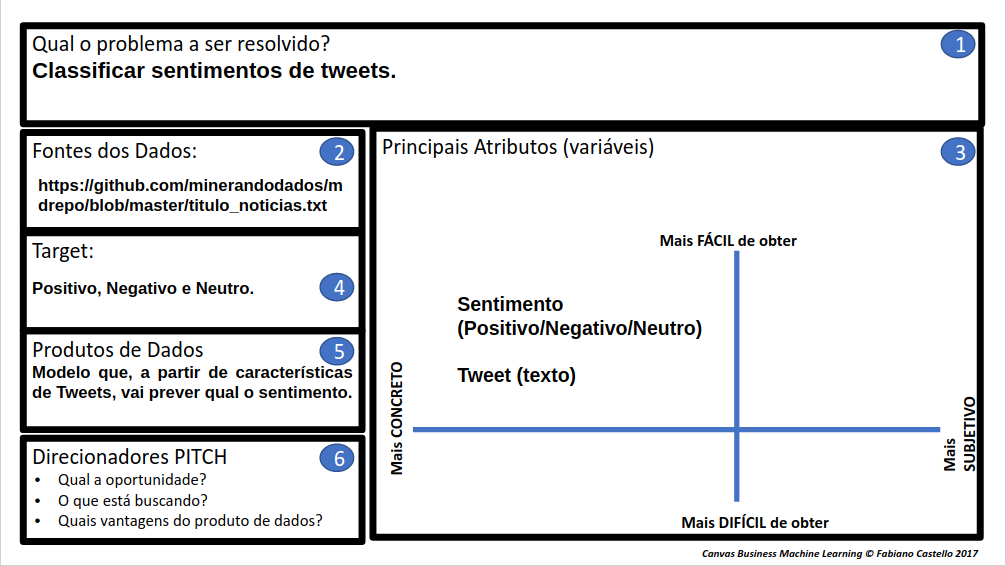

### Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
get_ipython().run_line_magic('matplotlib', 'inline')
from google.colab import files
# uploaded = files.upload()

### Base de dados

In [ ]:
df = pd.read_csv('./database.csv')

base_dados = df.values.tolist()

### Eexemplo da base de dados

In [ ]:
exemplo_base = pd.read_csv('./database.csv')
exemplo_base.columns = ['frase','clasificacao']
print('Tamanho da base {}'.format(exemplo_base.shape[0]))
exemplo_base.clasificacao.value_counts()
print((exemplo_base.clasificacao.value_counts()/exemplo_base.shape[0])*100)
exemplo_base.sample(n=20)

Tamanho da base 2123
 positivo    43.570419
 negativo    35.138954
 neutro      21.290626
Name: clasificacao, dtype: float64


,frase,clasificacao
1567,homem mais rico brasil,positivo
110,acionistas votam hoje fusão all rumo santande...,neutro
627,produção petrobras decepciona meta 2014 desaf...,negativo
1148,mmx fecha tri prejuízo geração caixa negativa...,negativo
1351,ambev ficará dividendos amanhã veja vale pena...,positivo
750,economia produção petróleo petrobras sobe ago...,positivo
177,ambev abre vagas supervisor processo armazém ...,neutro
1966,ações queda estratégia sabesp minar eleição c...,negativo
1694,lançamentos gafisa sobem tri 4138 noticias uo...,positivo
2009,análise relatórios contábeis eletrobrás elet3...,neutro


### Baixando lista de stopwords

In [ ]:
nltk.download('stopwords')
lista_Stop = nltk.corpus.stopwords.words('portuguese')
np.transpose(lista_Stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para',
       'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as',
       'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou',
       'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo',
       'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo',
       'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa',
       'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos',
       'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas',
       'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus',
       'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos',
       'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele',
       'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está',
       'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram',
       'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos

### Adicionando novas stopwords

In [ ]:
lista_Stop.append('tipo')
lista_Stop.append('tão')
lista_Stop.append('tudo')
lista_Stop.append('vai')
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### Função para remover stopwords

In [ ]:
def removeStropWords(texto):
    for(palavras, sentimento) in texto:
        semStop = [p for p in palavras.split() if p not in lista_Stop]
        frases.append((semStop, sentimento))
    return frases

### Aplicar Stemmer nas frases da base de dados

In [ ]:
def aplica_Stemmer(texto):
    stemmer = nltk.stem.RSLPStemmer()
    frases_sem_Stemming = []
    for(palavras, sentimento) in texto:
        com_Stemming = [str(stemmer.stem(p)) for p in palavras.split() if p not in lista_Stop]
        frases_sem_Stemming.append((com_Stemming, sentimento))
    return frases_sem_Stemming

In [ ]:
frases_com_Stem = aplica_Stemmer(base_dados)

### Exemplo base de dados depois de aplicar stemmer

In [ ]:
pd.DataFrame(frases_com_Stem, columns=['Frase', 'Sentimento']).sample(10)

,Frase,Sentimento
1256,"[crédit, veícul, cai, junh, segund, cetip]",neutro
412,"[kroton, azar, cheg, top, mund, exam]",positivo
1618,"[dilm, crít, petrobr, vão, perd, imens, mar, p...",positivo
1544,"[blog, sara, banc, santand, espanhol, emili, b...",negativo
1484,"[laud, opa, brookfield, est, preç, açã, 129, 1...",neutro
1086,"[vej, açõ, pod, gole, cop, mund, aproveit, opo...",positivo
813,"[aument, tarif, copel, pod, ser, autor, terç, ...",positivo
1578,"[ibovesp, ampl, qued, correç, miner, siderúrg,...",negativo
260,"[cart, difer, invest, bols, segund, concórd]",positivo
167,"[açã, caiu, 2014, pod, est, pi, ceo]",negativo


### Buscar palavras

In [ ]:
def busca_Palavras(frases):
    todas_palavras = []
    for(palavras, sentimento) in frases:
        todas_palavras.extend(palavras)
    return todas_palavras

In [ ]:
palavras = busca_Palavras(frases_com_Stem)

In [ ]:
print("Quantidade de palavras na base de Treinamento{}".format(pd.DataFrame(palavras).count()))

Quantidade de palavras na base de Treinamento0    17014
dtype: int64


In [ ]:
def busca_frequencia(palavras):
    palavras = nltk.FreqDist(palavras)
    return palavras

In [ ]:
frequencia = busca_frequencia(palavras)

In [ ]:
def busca_palavra_unicas(frequencia):
    freq = frequencia.keys()
    return freq

palavras_unicas = busca_palavra_unicas(frequencia)

In [ ]:
def extrator_palavras(documento):
    doc = set(documento)
    caracteristicas = {}
    for palavras in palavras_unicas:
        caracteristicas['%s' % palavras] = (palavras in doc)
    return caracteristicas

### Separar base de dados de treino e teste

In [ ]:
teste = []
treino = []

for i in range(len(frases_com_Stem)):
  if i <= 1486:
    treino.append(frases_com_Stem[i])
  else:
    teste.append(frases_com_Stem[i])

base_teste = nltk.classify.apply_features(extrator_palavras, teste)
base_treino = nltk.classify.apply_features(extrator_palavras, treino)


### Treinamento

In [ ]:
classificador = nltk.NaiveBayesClassifier.train(base_treino)

In [ ]:
print(classificador.labels())

[' positivo', ' neutro', ' negativo']


In [ ]:
print(classificador.show_most_informative_features(10))

Most Informative Features
                  cantar = True            negat :  posit =     16.2 : 1.0
                     águ = True            negat :  posit =     13.5 : 1.0
                  pratic = True            neutr :  negat =     13.4 : 1.0
                    chin = True            posit :  negat =     11.0 : 1.0
                 program = True            neutr :  negat =     10.2 : 1.0
                  sabesp = True            negat :  posit =      9.9 : 1.0
                  racion = True            negat :  posit =      9.9 : 1.0
                     jat = True            posit :  negat =      9.8 : 1.0
                    disp = True            posit :  negat =      9.3 : 1.0
                     fic = True            neutr :  negat =      9.1 : 1.0
None


### Verificar erros do classificador

In [ ]:
int(nltk.classify.accuracy(classificador, base_teste))

0

In [ ]:
erros = []
for(frase, classe) in base_teste:
    resultado = classificador.classify(frase)
    if resultado != classe:
        erros.append((classe, resultado, frase))

In [ ]:
from nltk.metrics import ConfusionMatrix
esperado = []
previsto = []
for(frase, classe) in base_teste:
    resultado = classificador.classify(frase)
    previsto.append(resultado)
    esperado.append(classe)
    
matriz = ConfusionMatrix(esperado,previsto)
print(matriz)

          |             |
          |   n       p |
          |   e       o |
          |   g   n   s |
          |   a   e   i |
          |   t   u   t |
          |   i   t   i |
          |   v   r   v |
          |   o   o   o |
----------+-------------+
 negativo |<156> 23  37 |
   neutro |  32 <49> 43 |
 positivo |  41  25<230>|
----------+-------------+
(row = reference; col = test)



### Função para classificar

In [ ]:
def classificar(frase_twitter):  
  teste = frase_twitter
  testeStemming = []
  stemmer = nltk.stem.RSLPStemmer()
  for(palavras_treinamento) in teste.split():
      comStem = [p for p in palavras_treinamento.split()]
      testeStemming.append(str(stemmer.stem(comStem[0])))
      
  novo = extrator_palavras(testeStemming)

  print(classificador.classify(novo))
  distribuicao = classificador.prob_classify(novo)
  for classe in distribuicao.samples():
      print('\n%s: %f' % (classe, distribuicao.prob(classe)))

In [ ]:
classificar('mpf investigará presidente bovespa caso venda ações ogx economia notícia veja')

 positivo

 positivo: 0.699609

 neutro: 0.000079

 negativo: 0.300313


### Connectar twitter

In [ ]:
from textblob import TextBlob as tb
import tweepy
from time import sleep

key = 'AbUqRdpKGGPDK4dBvMrRnnUe1'
secret = 'VRo63ZCm0FbG9hHMu64gtbqUEG3TY5oU0uyo59db0wEELijPO4'
access_token = '1016827130880118785-Q7YtUpz95w6R829wxa39MtFqC2yPW5'
access_token_secret = 'btj6g1NX1OcuqEjTOR5cp2HCzVqu2REmNucMsSAgvJKYu'

In [ ]:
auth = tweepy.OAuthHandler(key, secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Pegando Tweets e classificando

In [ ]:
tweets = api.search('flamengo')

for tweet in tweets:
    frase = str(tb(tweet.text))
    print(frase)
    classificar(frase)
    sleep(5)

RT @GersonKoringa: "O Flamengo não perde pra um time pequeno a 3 anos"

ué, mas a gente perdeu pro Vasco na quinta
 positivo

 positivo: 0.522048

 neutro: 0.062449

 negativo: 0.415503
RT @Flamengo: É O ARTILHEIRO! MAIS UM GOL DE @Pedro9oficial! VAMOS PRA CIMA, MENGO! #PORXFLA #VamosFlamengo https://t.co/qwDKT4Y7px
 negativo

 positivo: 0.432304

 neutro: 0.015761

 negativo: 0.551935
Flamengo já cansou de avisar que esse ano vai juntar grana, mas os caras não entendem isso. Ou contrata um brasilei… https://t.co/ouiYwyGQj7
 positivo

 positivo: 0.760433

 neutro: 0.162103

 negativo: 0.077463
RT @flahistoria: 18 de Abril, 2004 🏆🔴⚫
#flahistoria

No @maracana com 74.444 pagantes, o Flamengo venceu o Vasco de virada 3 a 1 e conquist…
 positivo

 positivo: 0.569144

 neutro: 0.364753

 negativo: 0.066103
RT @crfmarkin: *Flamengo precisando de gol*

Michael:
 https://t.co/xer7ktGunb
 positivo

 positivo: 0.463648

 neutro: 0.404880

 negativo: 0.131472
RT @pedro97crf: medo de você? kkkkkkk